In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
# import matplotlib
# matplotlib.use('TkAgg')  # Or 'Qt5Agg'

In [10]:
import AWA_Star_Pancake as asp

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def run_all_tests(test_configurations):
    results = []
    
    for num_tests, pancake_size in test_configurations:
        print(f"Running tests with num_tests={num_tests} and pancake_size={pancake_size}...\n")
        start_states = asp.generate_random_start_states(pancake_size, num_tests)
        
        metrics = {}
        for heuristic_name, heuristic_func in heuristics.items():
            avg_time, avg_nodes, avg_cost, avg_memory = asp.run_tests_for_heuristic(heuristic_func, start_states, pancake_size)
            metrics[f"avg_time_{heuristic_name}"] = avg_time
            metrics[f"avg_nodes_{heuristic_name}"] = avg_nodes
            metrics[f"avg_cost_{heuristic_name}"] = avg_cost
            metrics[f"avg_memory_{heuristic_name}"] = avg_memory
        
        results.append({
            "num_tests": num_tests,
            "pancake_size": pancake_size,
            **metrics
        })
    
    return pd.DataFrame(results)

# Define heuristics
heuristics = {
    "gap": asp.gap_heuristic,
    "breakpoint": asp.breakpoint_heuristic,
    "position_based": asp.position_based_heuristic,
    "simple_avg": asp.simple_averaging_heuristic,
    "weighted_avg": lambda state: asp.weighted_averaging_heuristic(state, w1=0.3, w2=0.3, w3=0.4),
    "max": asp.max_heuristic
}

# Example configurations
test_configurations = [
    (100, 5),
    (200, 6),
    (200, 7),
    (100, 8),
    (30, 9),
    (10, 10),
    (1, 11)
]

# Run tests
results_df = run_all_tests(test_configurations)
print(results_df)

Running tests with num_tests=100 and pancake_size=5...

Running tests with num_tests=200 and pancake_size=6...

Running tests with num_tests=200 and pancake_size=7...

Running tests with num_tests=100 and pancake_size=8...

Running tests with num_tests=30 and pancake_size=9...

Running tests with num_tests=10 and pancake_size=10...

Running tests with num_tests=1 and pancake_size=11...

   num_tests  pancake_size  avg_time_gap  avg_nodes_gap  avg_cost_gap  \
0        100             5      0.000580         12.860      4.180000   
1        200             6      0.003006         48.185      5.245000   
2        200             7      0.020717        239.840      6.380000   
3        100             8      0.112479       1017.770      7.300000   
4         30             9      1.156610       8160.900      8.533333   
5         10            10     21.804066     120835.200     10.400000   
6          1            11     82.734556     394235.000     12.000000   

   avg_memory_gap  avg_ti

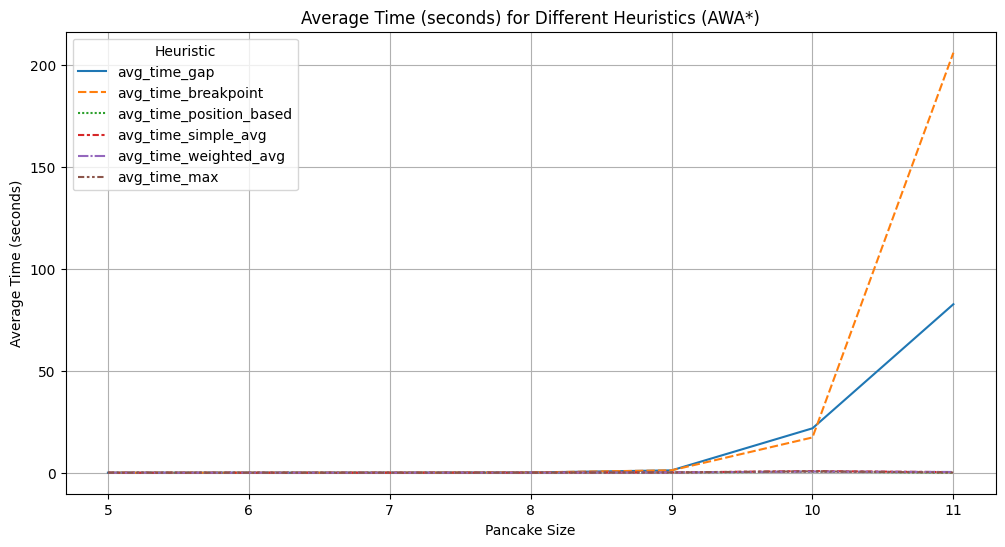

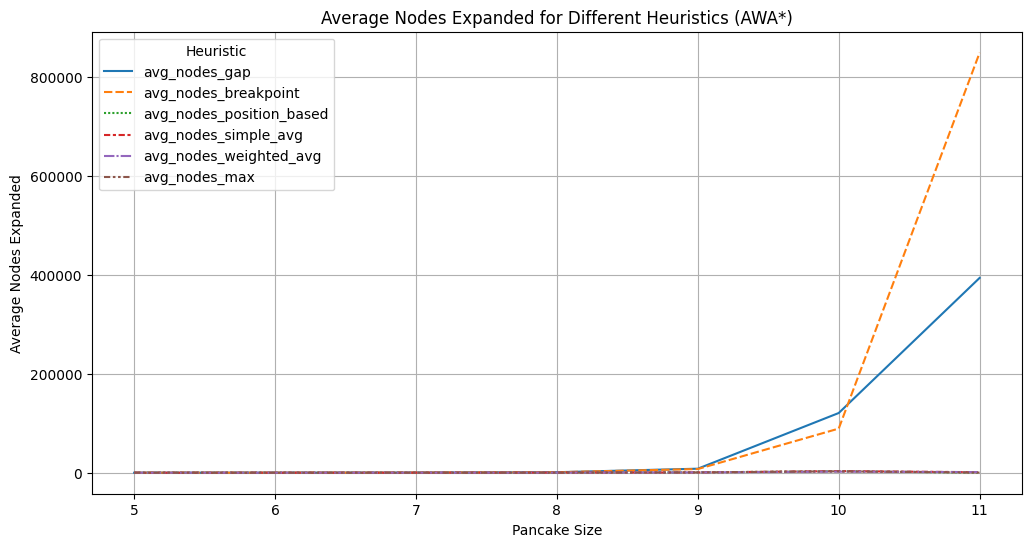

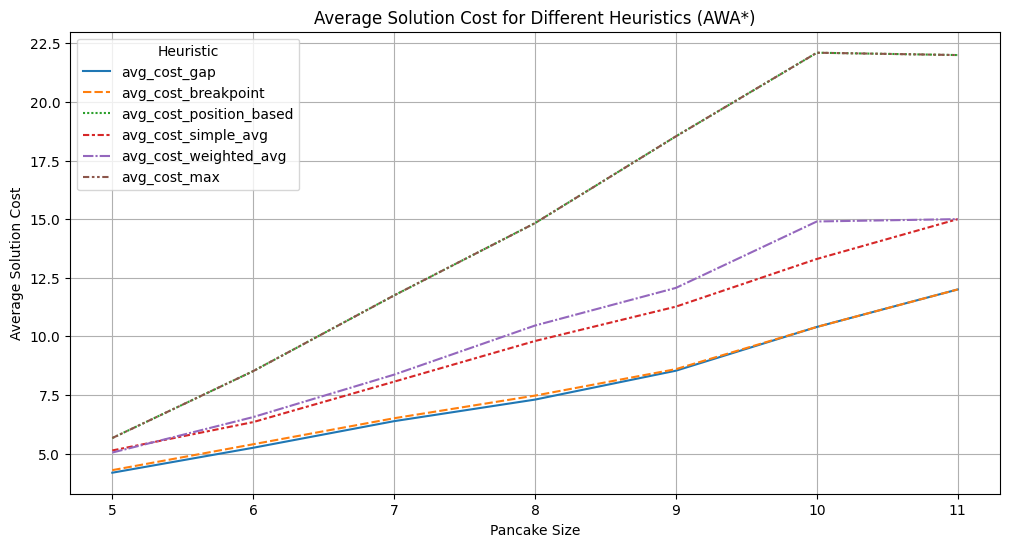

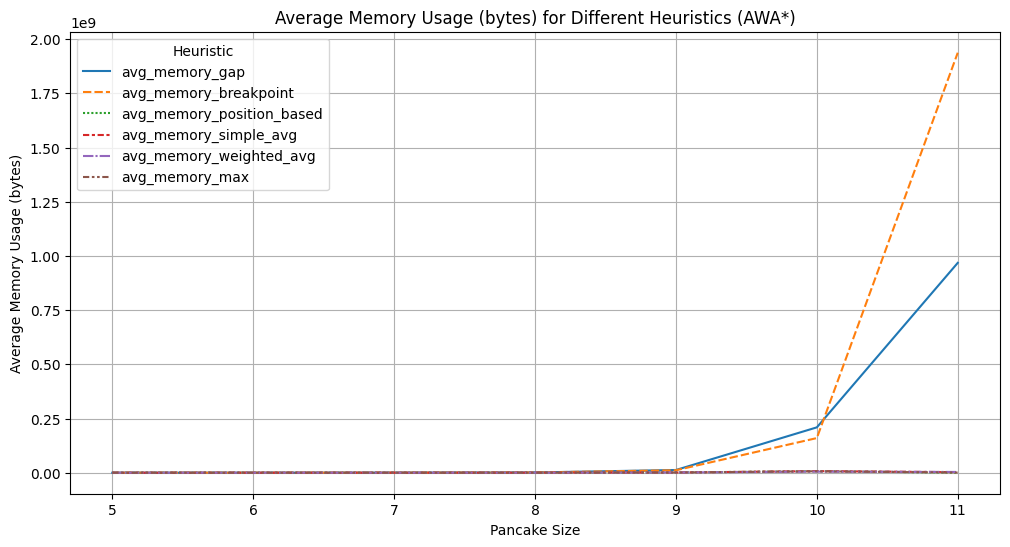

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_results(df):
    metrics = ['avg_time', 'avg_nodes', 'avg_cost', 'avg_memory']
    metric_titles = {
        'avg_time': 'Average Time (seconds)',
        'avg_nodes': 'Average Nodes Expanded',
        'avg_cost': 'Average Solution Cost',
        'avg_memory': 'Average Memory Usage (bytes)'
    }
    
    for metric in metrics:
        plt.figure(figsize=(12, 6))
        
        # Filter the dataframe for the current metric
        metric_df = df.melt(id_vars=["num_tests", "pancake_size"], var_name="metric", value_name="value")
        metric_df = metric_df[metric_df['metric'].str.contains(metric)]
        
        # Plot the data
        sns.lineplot(data=metric_df, x='pancake_size', y='value', hue='metric', style='metric')
        
        # Set plot titles and labels
        plt.title(f'{metric_titles[metric]} for Different Heuristics (AWA*)')
        plt.xlabel('Pancake Size')
        plt.ylabel(metric_titles[metric])
        plt.legend(title='Heuristic')
        plt.grid(True)
        
        # Show the plot
        plt.show()

# Assuming `results_df` contains the results from all tests
plot_results(results_df)


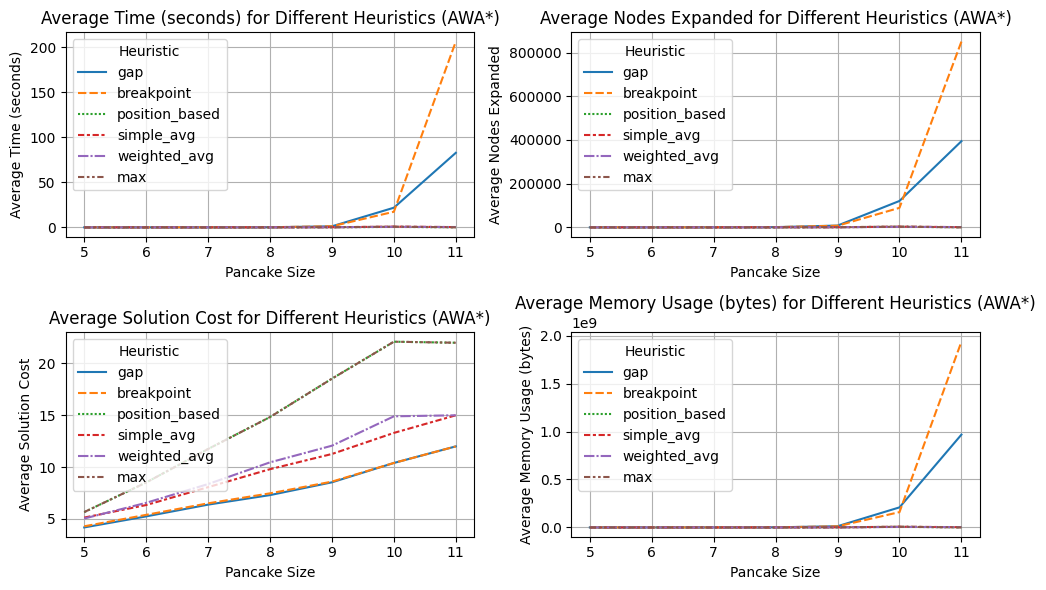

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_results(df):
    metrics = ['avg_time', 'avg_nodes', 'avg_cost', 'avg_memory']
    metric_titles = {
        'avg_time': 'Average Time (seconds)',
        'avg_nodes': 'Average Nodes Expanded',
        'avg_cost': 'Average Solution Cost',
        'avg_memory': 'Average Memory Usage (bytes)'
    }
    
    # Create a figure with subplots
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
    axes = axes.flatten()  # Flatten to make it easier to iterate

    for idx, metric in enumerate(metrics):
        ax = axes[idx]
        
        # Filter the dataframe for the current metric
        metric_df = df.melt(id_vars=["num_tests", "pancake_size"], 
                            value_vars=[col for col in df.columns if metric in col],
                            var_name="heuristic", value_name="value")
        
        # Extract heuristic names for the plot
        metric_df['heuristic'] = metric_df['heuristic'].apply(lambda x: x.replace(f"{metric}_", ""))
        
        # Plot the data
        sns.lineplot(data=metric_df, x='pancake_size', y='value', hue='heuristic', style='heuristic', ax=ax)
        
        # Set plot titles and labels
        ax.set_title(f'{metric_titles[metric]} for Different Heuristics (AWA*)')
        ax.set_xlabel('Pancake Size')
        ax.set_ylabel(metric_titles[metric])
        ax.legend(title='Heuristic')
        ax.grid(True)
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    
    # Show the figure
    plt.show()

# Plot the results
plot_results(results_df)

In [14]:
# Save results to a CSV file
results_df.to_csv('AWA_Star_pancake_problem_results.csv', index=False)

# Display the table
import IPython
IPython.display.display(results_df)

num_tests  pancake_size  avg_time_gap  avg_nodes_gap  avg_cost_gap  \
0        100             5      0.000580         12.860      4.180000   
1        200             6      0.003006         48.185      5.245000   
2        200             7      0.020717        239.840      6.380000   
3        100             8      0.112479       1017.770      7.300000   
4         30             9      1.156610       8160.900      8.533333   
5         10            10     21.804066     120835.200     10.400000   
6          1            11     82.734556     394235.000     12.000000   

   avg_memory_gap  avg_time_breakpoint  avg_nodes_breakpoint  \
0    3.228540e+03             0.000608             11.900000   
1    2.218351e+04             0.003371             46.720000   
2    1.729536e+05             0.024454            243.335000   
3    1.157623e+06             0.142422           1079.070000   
4    1.257282e+07             1.185429           7467.766667   
5    2.092306e+08            17.315637          89315.500000   
6    9.679706e+08           206.212541         849879.000000   

   avg_cost_breakpoint  avg_memory_breakpoint  ...  avg_cost_simple_avg  \
0                4.290           3.007360e+03  ...             5.130000   
1                5.395           2.213024e+04  ...             6.340000   
2                6.505           1.758406e+05  ...             8.065000   
3                7.470           1.217653e+06  ...             9.800000   
4                8.600           1.141726e+07  ...            11.266667   
5               10.400           1.598361e+08  ...            13.300000   
6               12.000           1.937150e+09  ...            15.000000   

   avg_memory_simple_avg  avg_time_weighted_avg  avg_nodes_weighted_avg  \
0           3.129140e+03               0.001082               10.920000   
1           1.559324e+04               0.002901               30.655000   
2           7.925776e+04               0.011614               87.905000   
3           3.492568e+05               0.047444              245.690000   
4           1.027663e+06               0.139289              647.566667   
5           7.369604e+06               0.580995             2247.400000   
6           2.637980e+06               0.365862             1289.000000   

   avg_cost_weighted_avg  avg_memory_weighted_avg  avg_time_max  \
0               5.040000             2.856310e+03      0.000804   
1               6.555000             1.454720e+04      0.001882   
2               8.365000             7.142216e+04      0.006223   
3              10.460000             2.860851e+05      0.024522   
4              12.066667             1.076220e+06      0.147005   
5              14.900000             5.147857e+06      0.703336   
6              15.000000             3.522532e+06      0.090564   

   avg_nodes_max  avg_cost_max  avg_memory_max  
0           8.99      5.660000    2.432000e+03  
1          19.17      8.515000    8.447120e+03  
2          50.51     11.745000    3.985448e+04  
3         153.08     14.830000    1.679510e+05  
4         702.70     18.533333    1.152977e+06  
5        2887.80     22.100000    6.744680e+06  
6         325.00     22.000000    7.857720e+05  

[7 rows x 26 columns]